<a href="https://www.kaggle.com/code/vidhikishorwaghela/loan-approval-prediction-v2?scriptVersionId=202650604" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📊 Loan Status Prediction Project Overview

## 🌟 Introduction
In this project, we aim to predict loan status using machine learning techniques. The goal is to classify loans as either approved or denied based on various features.

## 📥 Data Loading
We start by loading the training and test datasets from a specified source. This data contains information on loans, including various borrower details and their respective statuses.

## 🔍 Feature Identification
We categorize the features in our dataset into numerical and categorical types. Numerical features are continuous values, while categorical features represent discrete categories.

## ⚙️ Data Preprocessing
Data preprocessing is crucial for preparing our model. We utilize a column transformer to handle the different types of features:
- **Numerical Features**: Scaled using **StandardScaler** to standardize the range.
- **Categorical Features**: Transformed using **OneHotEncoder** to convert categorical values into a numerical format that the model can interpret.

## 📈 Splitting the Data
The dataset is split into training and validation sets. This allows us to train the model on one portion of the data while evaluating its performance on another, ensuring that we avoid overfitting.

## 🧪 Model Creation
We create a pipeline that integrates data preprocessing and the Random Forest classifier. This model is chosen for its robustness and ability to handle various feature types effectively.

## 🔍 Hyperparameter Tuning
To optimize the model's performance, we perform hyperparameter tuning using **GridSearchCV**. This technique allows us to systematically test different combinations of parameters to identify the best-performing model configuration.

## 📊 Model Validation
After training, we validate the model on the validation set:
- We calculate the **ROC AUC** score to evaluate the model's ability to distinguish between approved and denied loans.
- The overall accuracy of our model is **95.11%**, demonstrating its effectiveness in making predictions.

## 📉 Confusion Matrix
A confusion matrix visualizes the model's performance, showing the counts of true positive, true negative, false positive, and false negative predictions. This helps us understand where the model excels and where it may struggle.

## 📋 Classification Report
We generate a classification report detailing key metrics such as precision, recall, and F1-score. This report provides insights into the model's performance across both classes, highlighting its strengths and weaknesses.

## 📈 ROC Curve
The ROC curve visualizes the true positive rate against the false positive rate. It helps us understand how well the model can differentiate between the classes at various threshold settings.

## 📦 Final Predictions
Finally, we make predictions on the test set and prepare a submission file that contains the IDs of the loans along with their predicted statuses.

## 🎉 Conclusion
This project showcases the complete workflow of a machine learning model, from data loading and preprocessing to model training and evaluation. Through careful tuning and validation, we aim to achieve high accuracy in predicting loan statuses, contributing to better decision-making in loan approvals.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve


In [2]:
# Loading the datasets
train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')


In [3]:
# Identify numerical and categorical columns
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_features.remove('loan_status')


In [4]:
# Define a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


In [5]:
# Split the training data into features and target
X = train_df.drop(columns='loan_status')
y = train_df['loan_status']


In [6]:
# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Create a Random Forest Classifier pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [8]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['id',
                                                                          'person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [9]:
# Best model
best_model = grid_search.best_estimator_

In [10]:
# Validate the model on the validation set
y_val_pred = best_model.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'Validation ROC AUC: {roc_auc:.4f}')


Validation ROC AUC: 0.9366


In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_val, best_model.predict(X_val))
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.9511


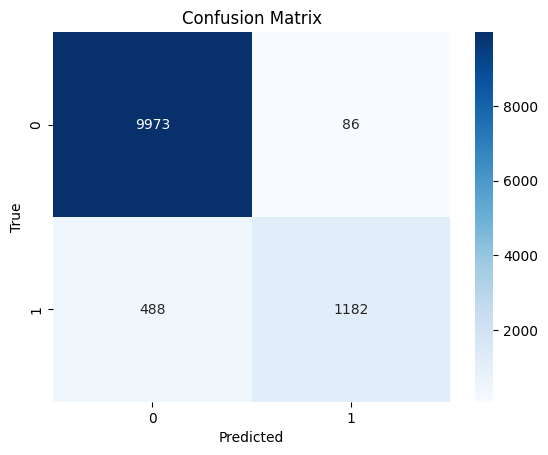

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_val, best_model.predict(X_val))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Classification Report
report = classification_report(y_val, best_model.predict(X_val))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10059
           1       0.93      0.71      0.80      1670

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



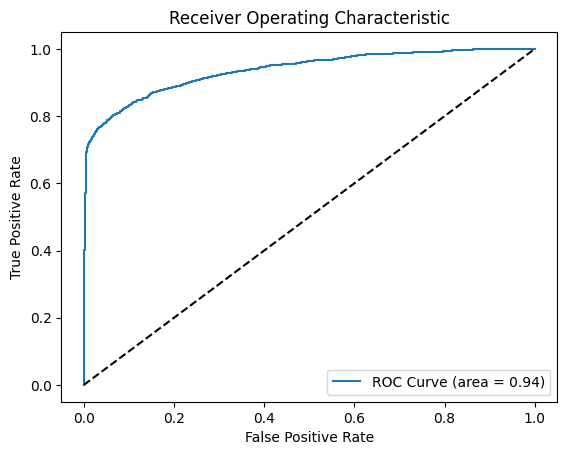

In [14]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [15]:
# Make predictions on the test set
test_predictions = best_model.predict_proba(test_df)[:, 1]  # Get probabilities for the positive class


In [16]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'loan_status': test_predictions
})